# **FGV EESP**

- ## Análise de Estacionariedade - Expectativa de Inflação
---



### **Bibliotecas**

In [1]:
# Testes de raiz unitária
install.packages("urca")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(dplyr)
library(ggplot2)
library(httr)
library(lubridate)
library(readxl)
library(urca)
library(tidyverse)

### **Dados**

In [5]:
# Caminho do arquivo original
file_path <- "https://github.com/matheusrmorgado/inflation-expectation/raw/main/data/public_data.xlsx"

# Download do arquivo
download.file(file_path, "public_data.xlsx")

# Ler o arquivo Excel e converter em dataframe
df_public_data <- as.data.frame(read_excel("public_data.xlsx"))

# Converter year e month_name
df_public_data <- df_public_data %>%
  mutate(year = as.numeric(year),  # Converter year para numérico
         month_name = factor(month_name, levels = month.abb, ordered = TRUE))  # Converter month_name para um fator ordenado

# Converter month_date
df_public_data$month_date <- ymd(df_public_data$month_date)  # Converter month_date para formato Date

# Lista de variáveis para transformar em séries temporais
vars_to_convert <- c("month", "market_inflation_expectation", "consumer_inflation_expectation", "inflation_target", "inflation_target_lower_bound", "inflation_target_upper_bound", "inflation_target_wtd_avg", "inflation_target_lower_bound_wtd_avg", "inflation_target_upper_bound_wtd_avg", "ipca", "selic", "selic_deflated", "minimum_wage_increase", "minimum_wage_increase_deflated", "income_increase", "income_increase_deflated", "household_income_deflated", "household_income_deflated_trend", "household_income_deflated_trend_diff", "real_exchange_rate", "real_exchange_rate_trend", "real_exchange_rate_trend_diff", "pib", "primary_fiscal_result", "primary_fiscal_result_pct_pib", "ipca_lag", "selic_deflated_lag", "primary_fiscal_result_pct_pib_lag", "real_exchange_rate_trend_diff_lag", "household_income_deflated_trend_diff_lag")

# Loop para transformar as variáveis em séries temporais
for (var in vars_to_convert) {
  df_public_data[[var]] <- ts(df_public_data[[var]], start = c(2006, 1), frequency = 12)
}

In [6]:
head(df_public_data, 5)

,year,month_name,month_date,month,market_inflation_expectation,consumer_inflation_expectation,consumer_confidence_index,inflation_target,inflation_target_lower_bound,inflation_target_upper_bound,⋯,real_exchange_rate_trend,real_exchange_rate_trend_diff,pib,primary_fiscal_result,primary_fiscal_result_pct_pib,ipca_lag,selic_deflated_lag,primary_fiscal_result_pct_pib_lag,real_exchange_rate_trend_diff_lag,household_income_deflated_trend_diff_lag
,<dbl>,<ord>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2006,Jan,2006-01-01,2006.000,4.58,6.9,93.3,4.5,2.5,6.5,⋯,98.40492,2.311963,2190643,1047626,0.4782,5.69,11.87435,0.4792,2.145933,2.755339
2,2006,Feb,2006-02-01,2006.083,4.49,7.0,92.8,4.5,2.5,6.5,⋯,98.02960,-2.641655,2207671,1054869,0.4778,5.70,11.30558,0.4782,2.311963,2.489243
3,2006,Mar,2006-03-01,2006.167,4.36,6.9,93.0,4.5,2.5,6.5,⋯,97.65434,-2.421135,2225145,1060503,0.4766,5.51,11.15534,0.4778,-2.641655,2.064600
4,2006,Apr,2006-04-01,2006.250,4.16,6.5,91.8,4.5,2.5,6.5,⋯,97.27915,-2.198977,2235813,1054019,0.4714,5.32,10.84314,0.4766,-2.421135,1.707381
5,2006,May,2006-05-01,2006.333,4.18,6.7,90.7,4.5,2.5,6.5,⋯,96.90401,2.482859,2256419,1061011,0.4702,4.63,11.04846,0.4714,-2.198977,1.268677


### **Análise de Estacionariedade**

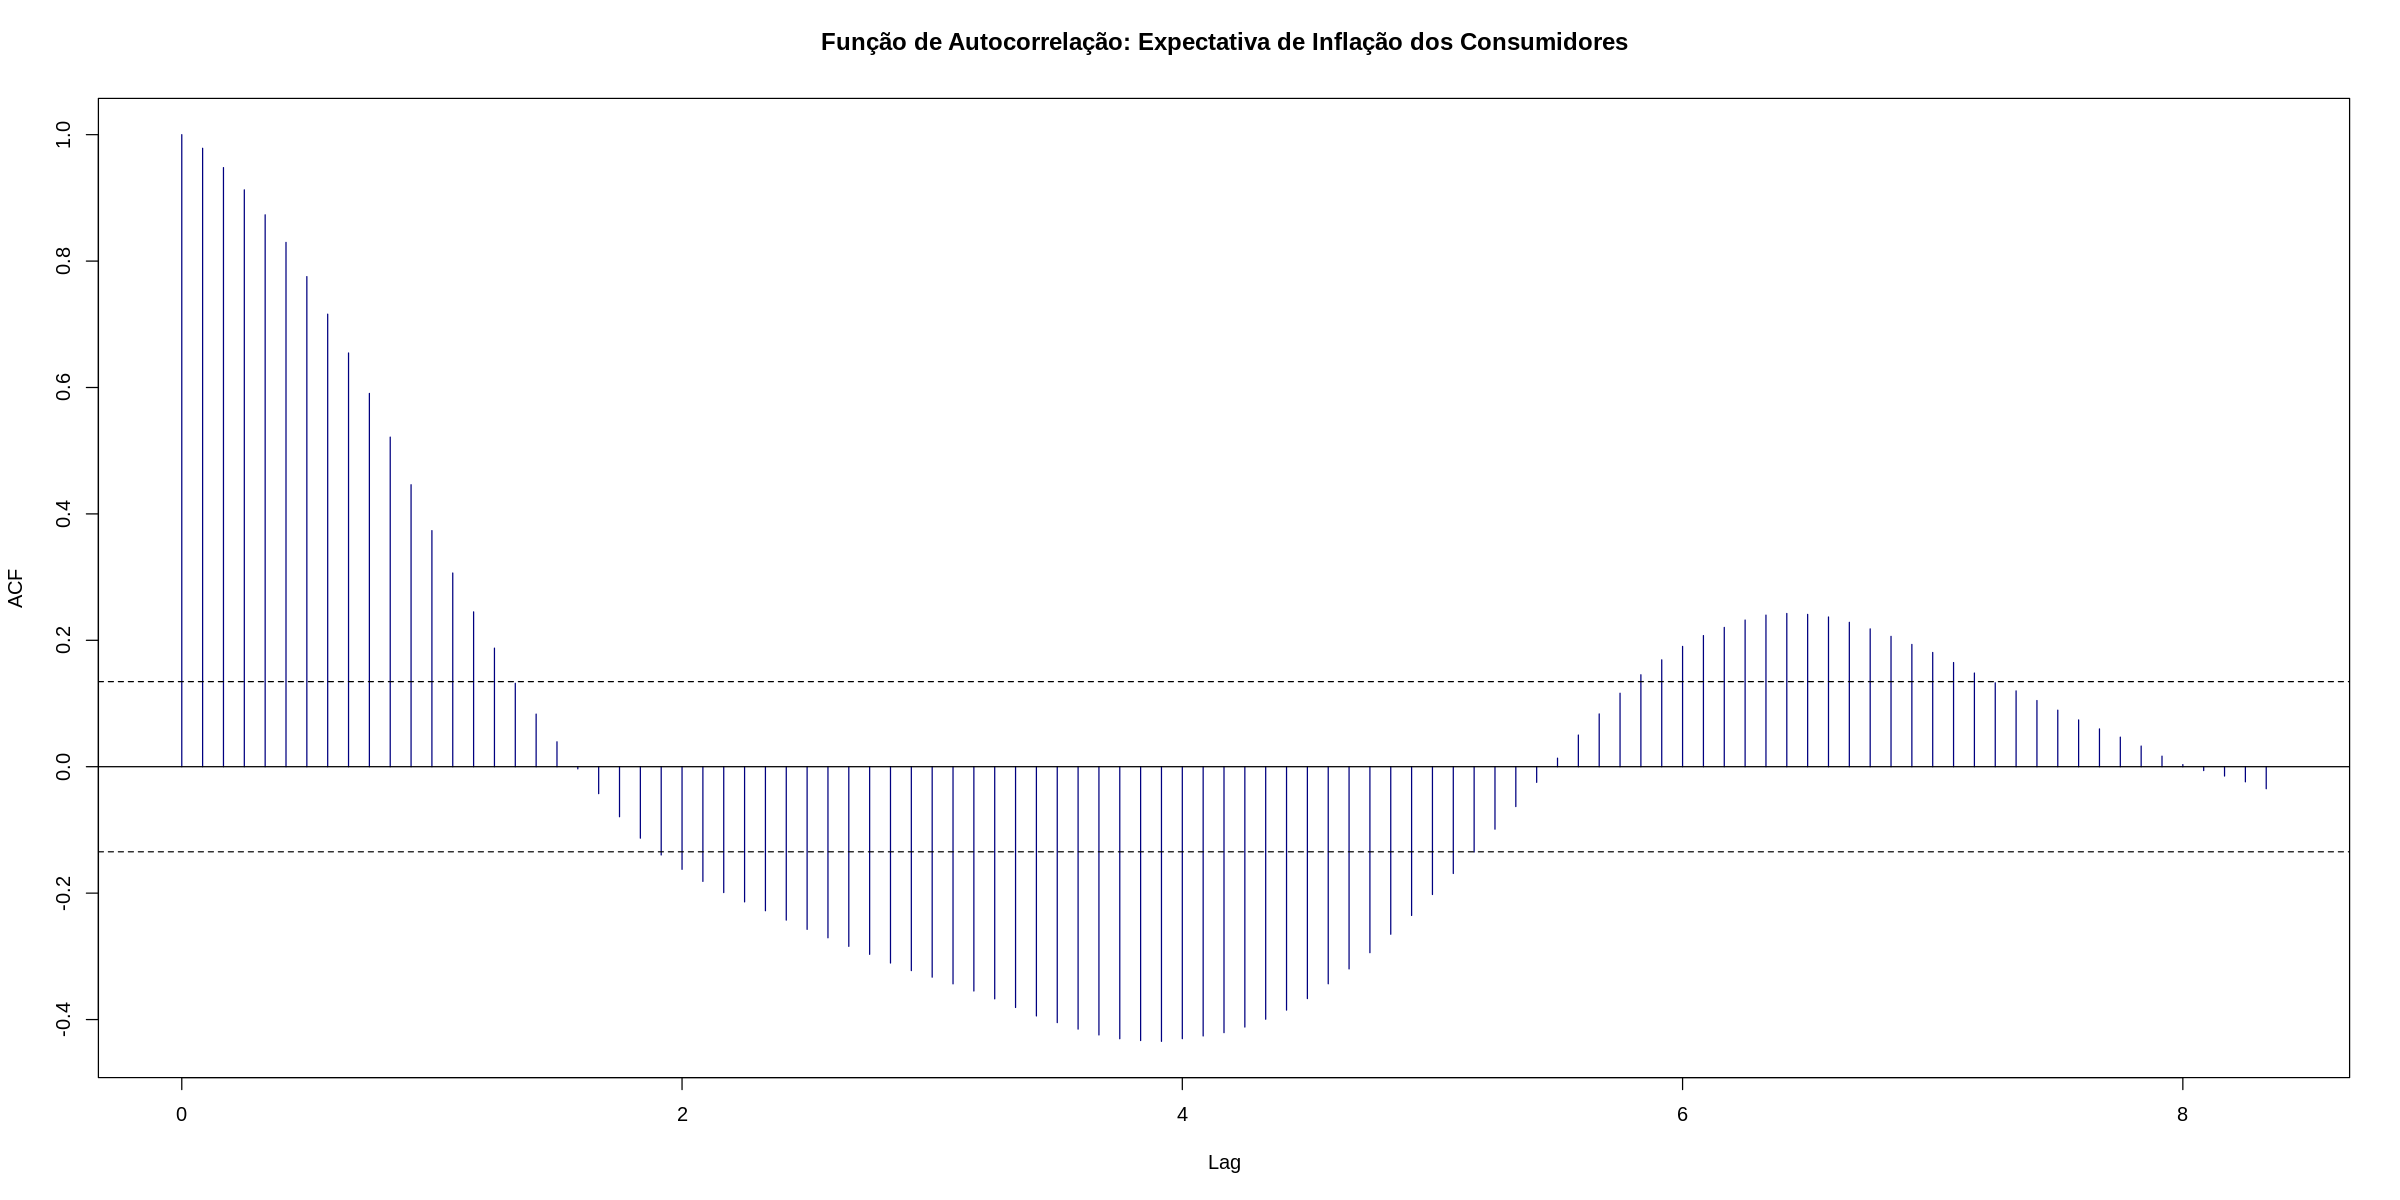

In [7]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Função de Autocorrelação
acf(df_public_data$consumer_inflation_expectation,
    main = "Função de Autocorrelação: Expectativa de Inflação dos Consumidores",
    col = "navy",
    ci.col = "black",
    lag.max = 100)

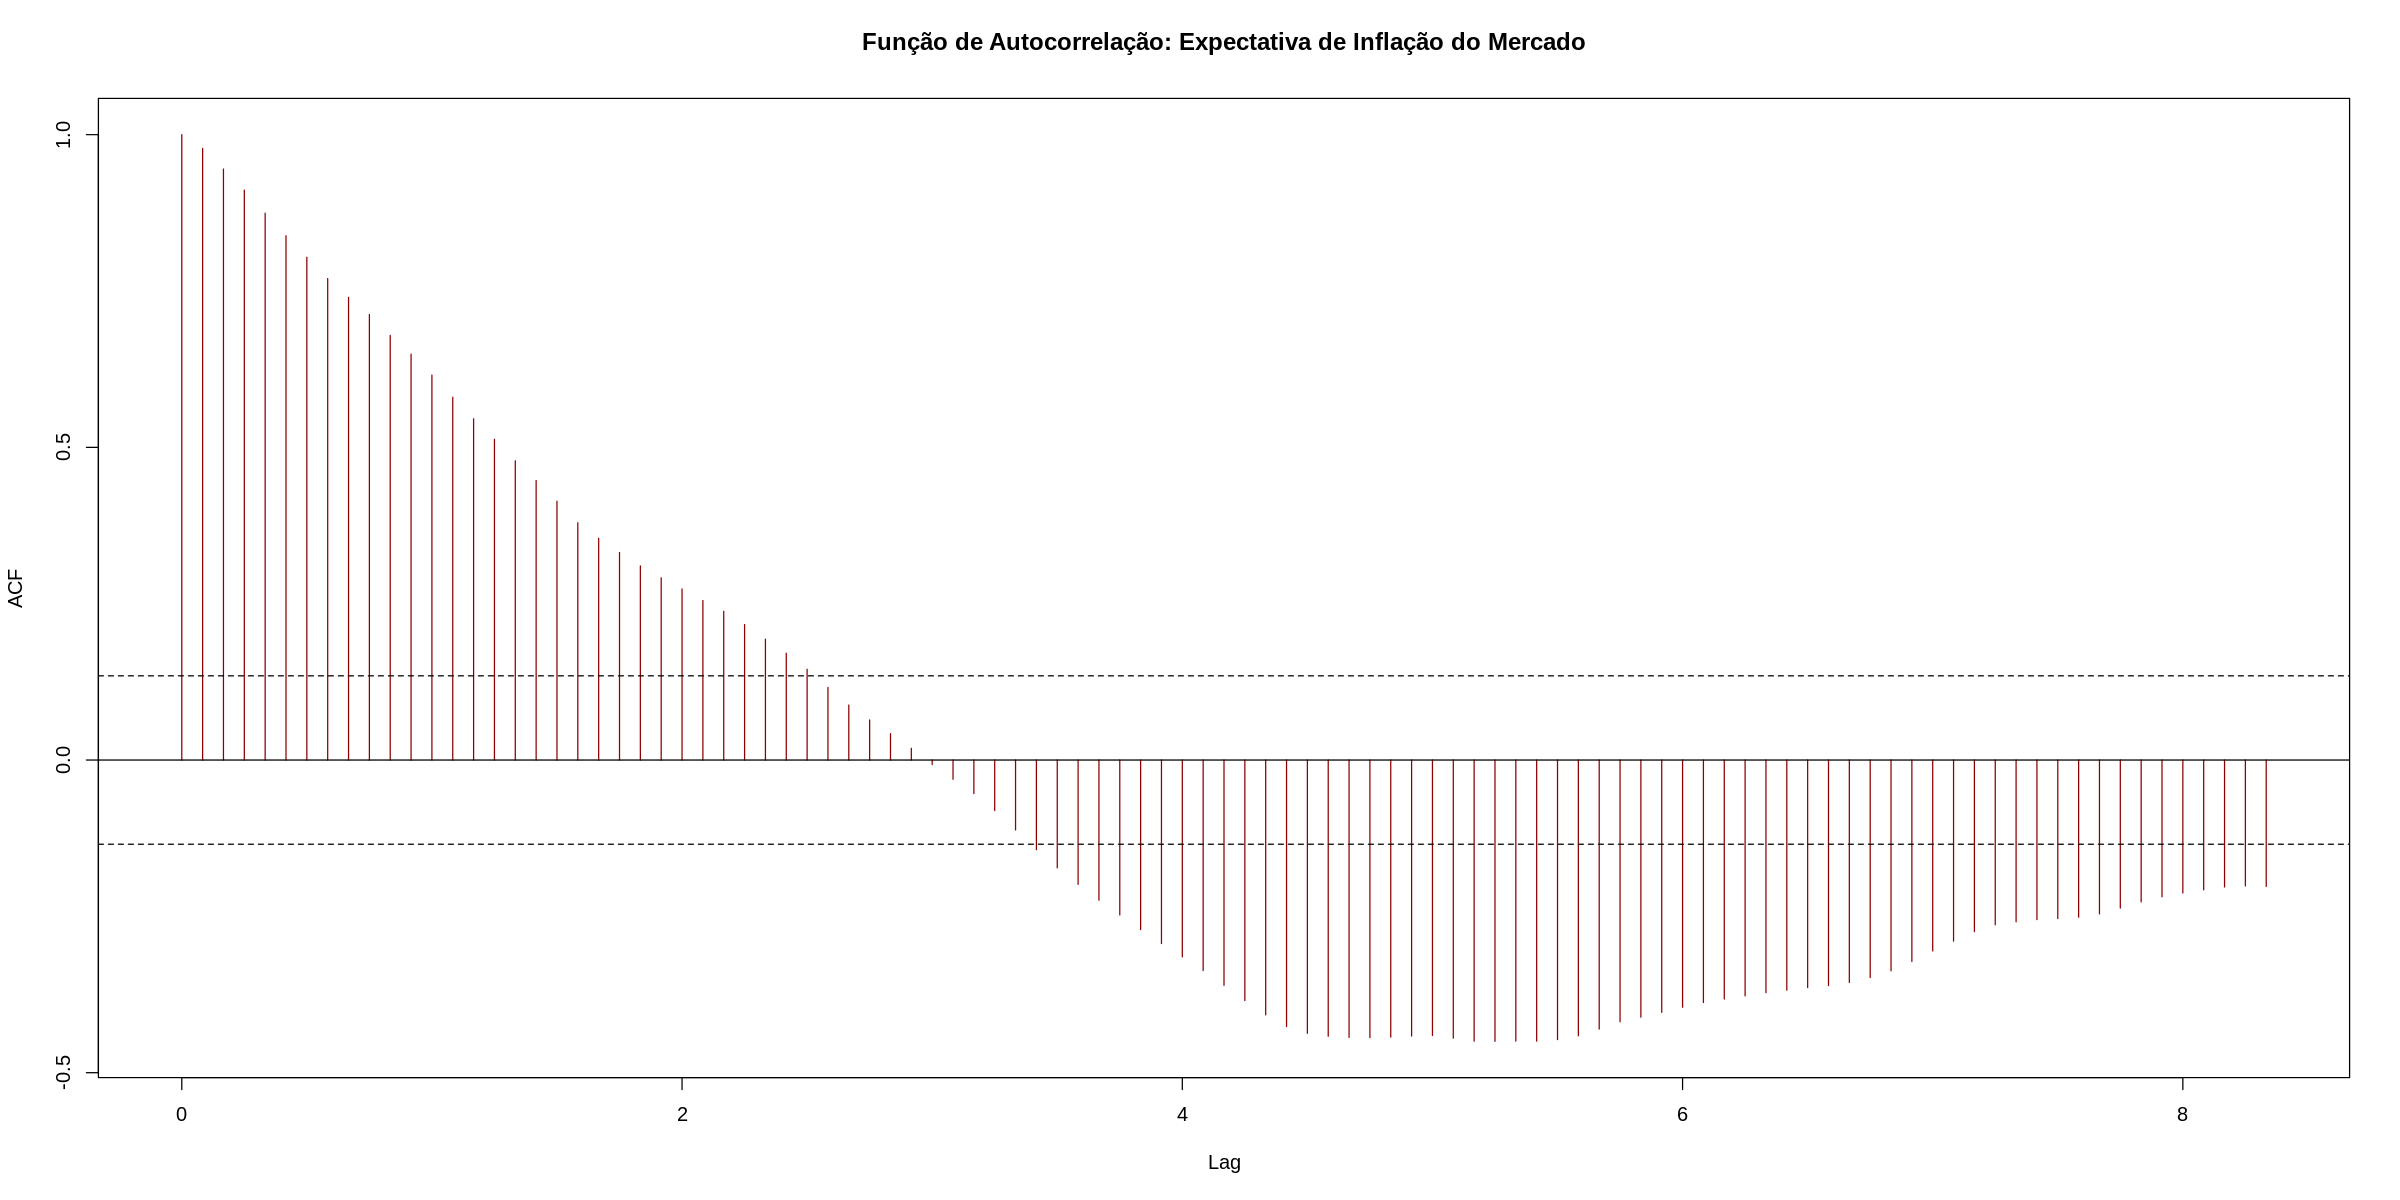

In [8]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Função de Autocorrelação
acf(df_public_data$market_inflation_expectation,
    main = "Função de Autocorrelação: Expectativa de Inflação do Mercado",
    col = "darkred",
    ci.col = "black",
    lag.max = 100)

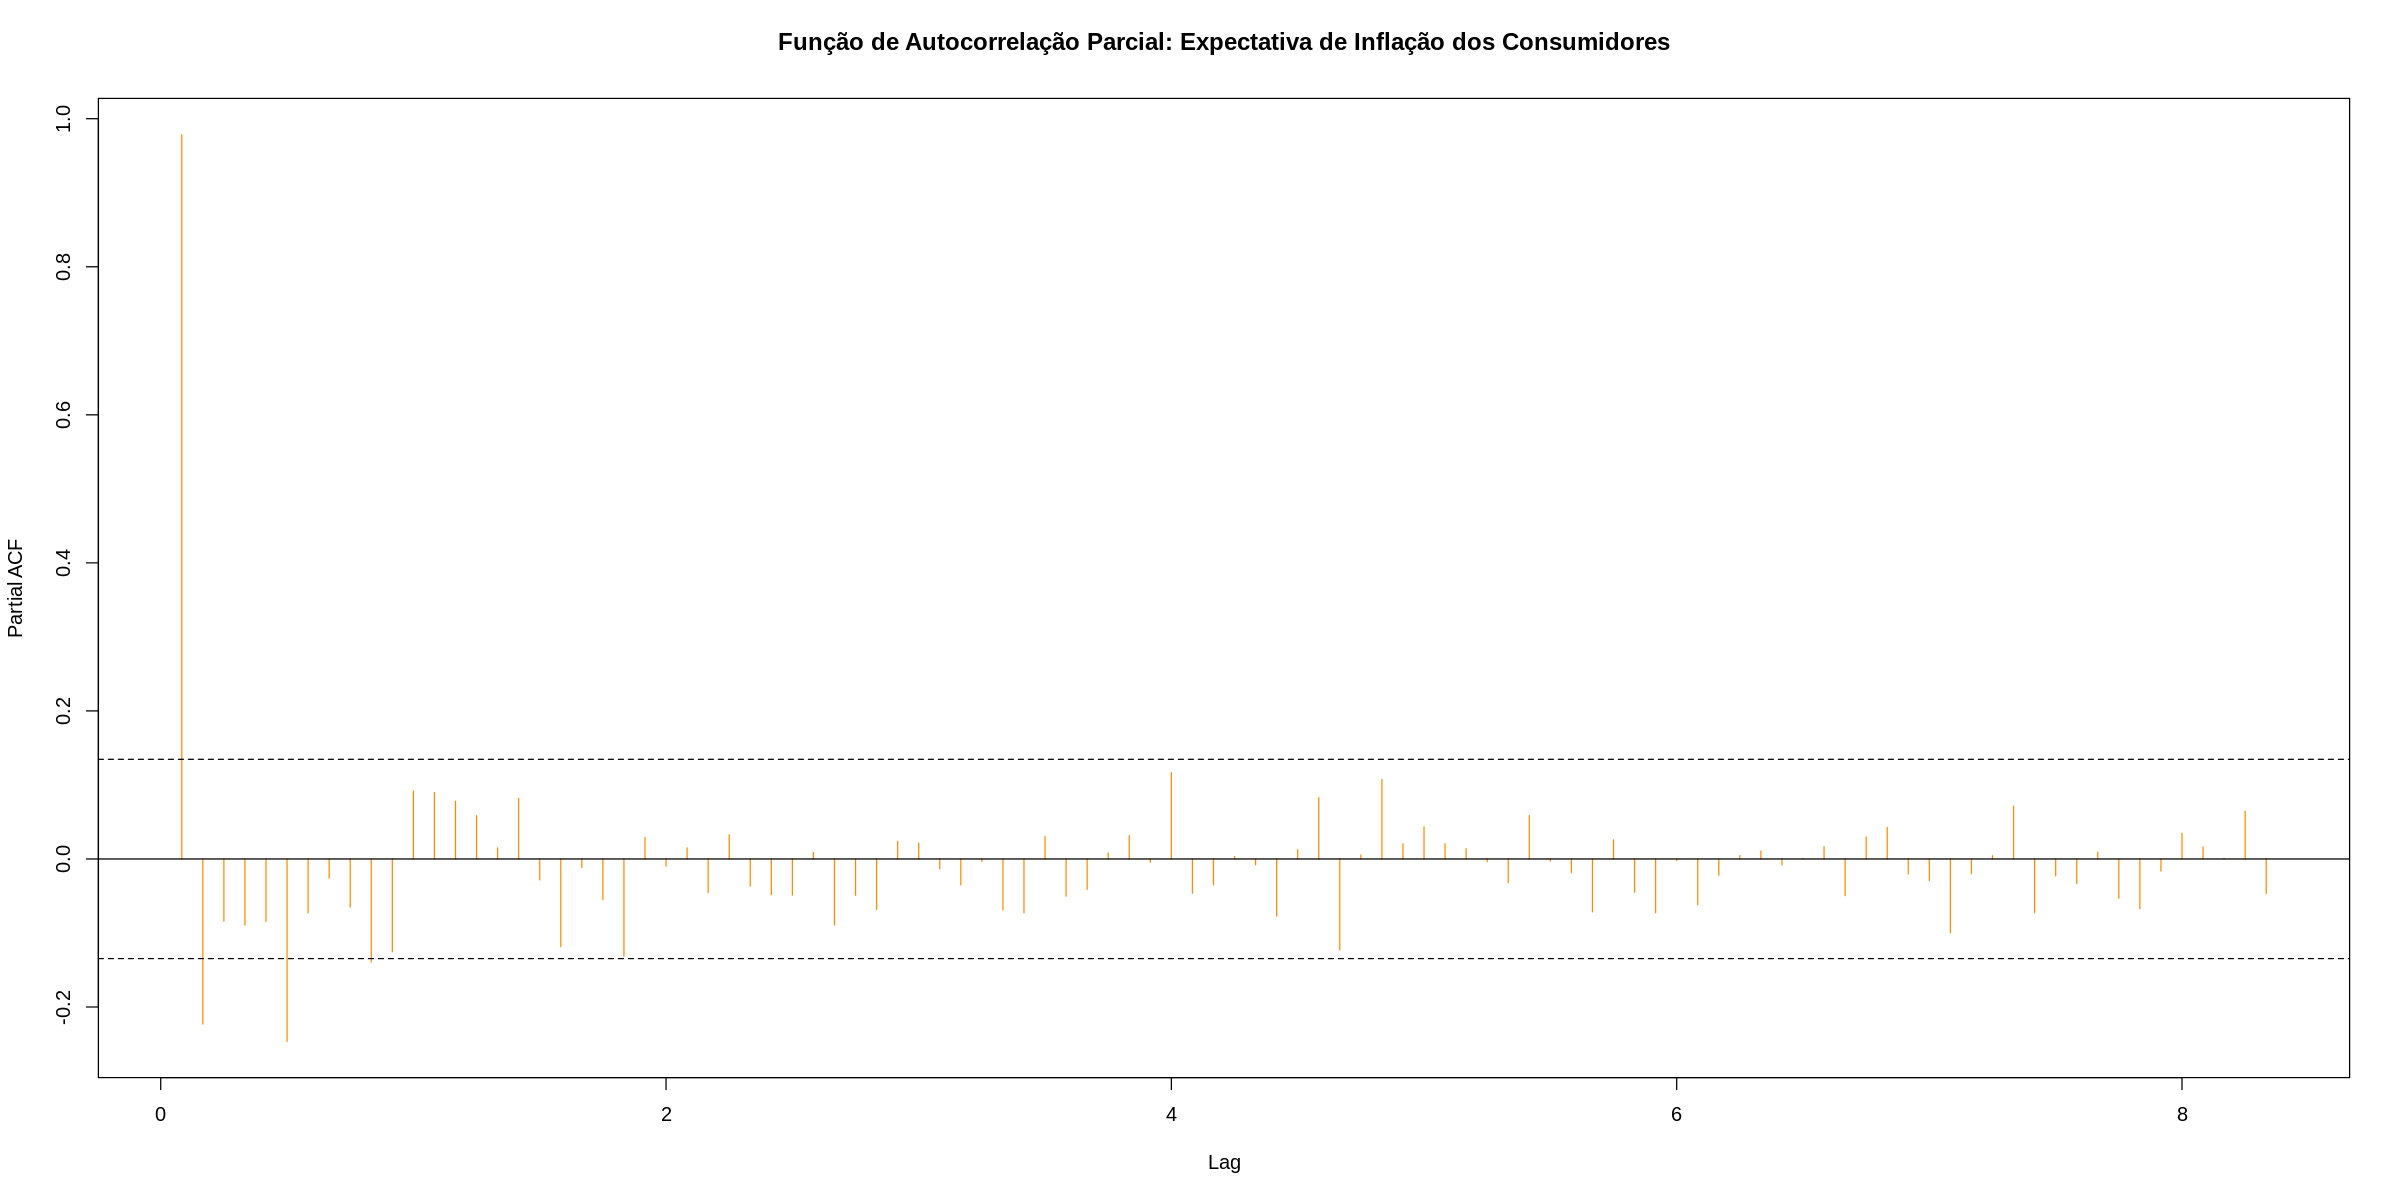

In [9]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Função de Autocorrelação Parcial
pacf(df_public_data$consumer_inflation_expectation,
    main = "Função de Autocorrelação Parcial: Expectativa de Inflação dos Consumidores",
    col = "darkorange",
    ci.col = "black",
    lag.max = 100)

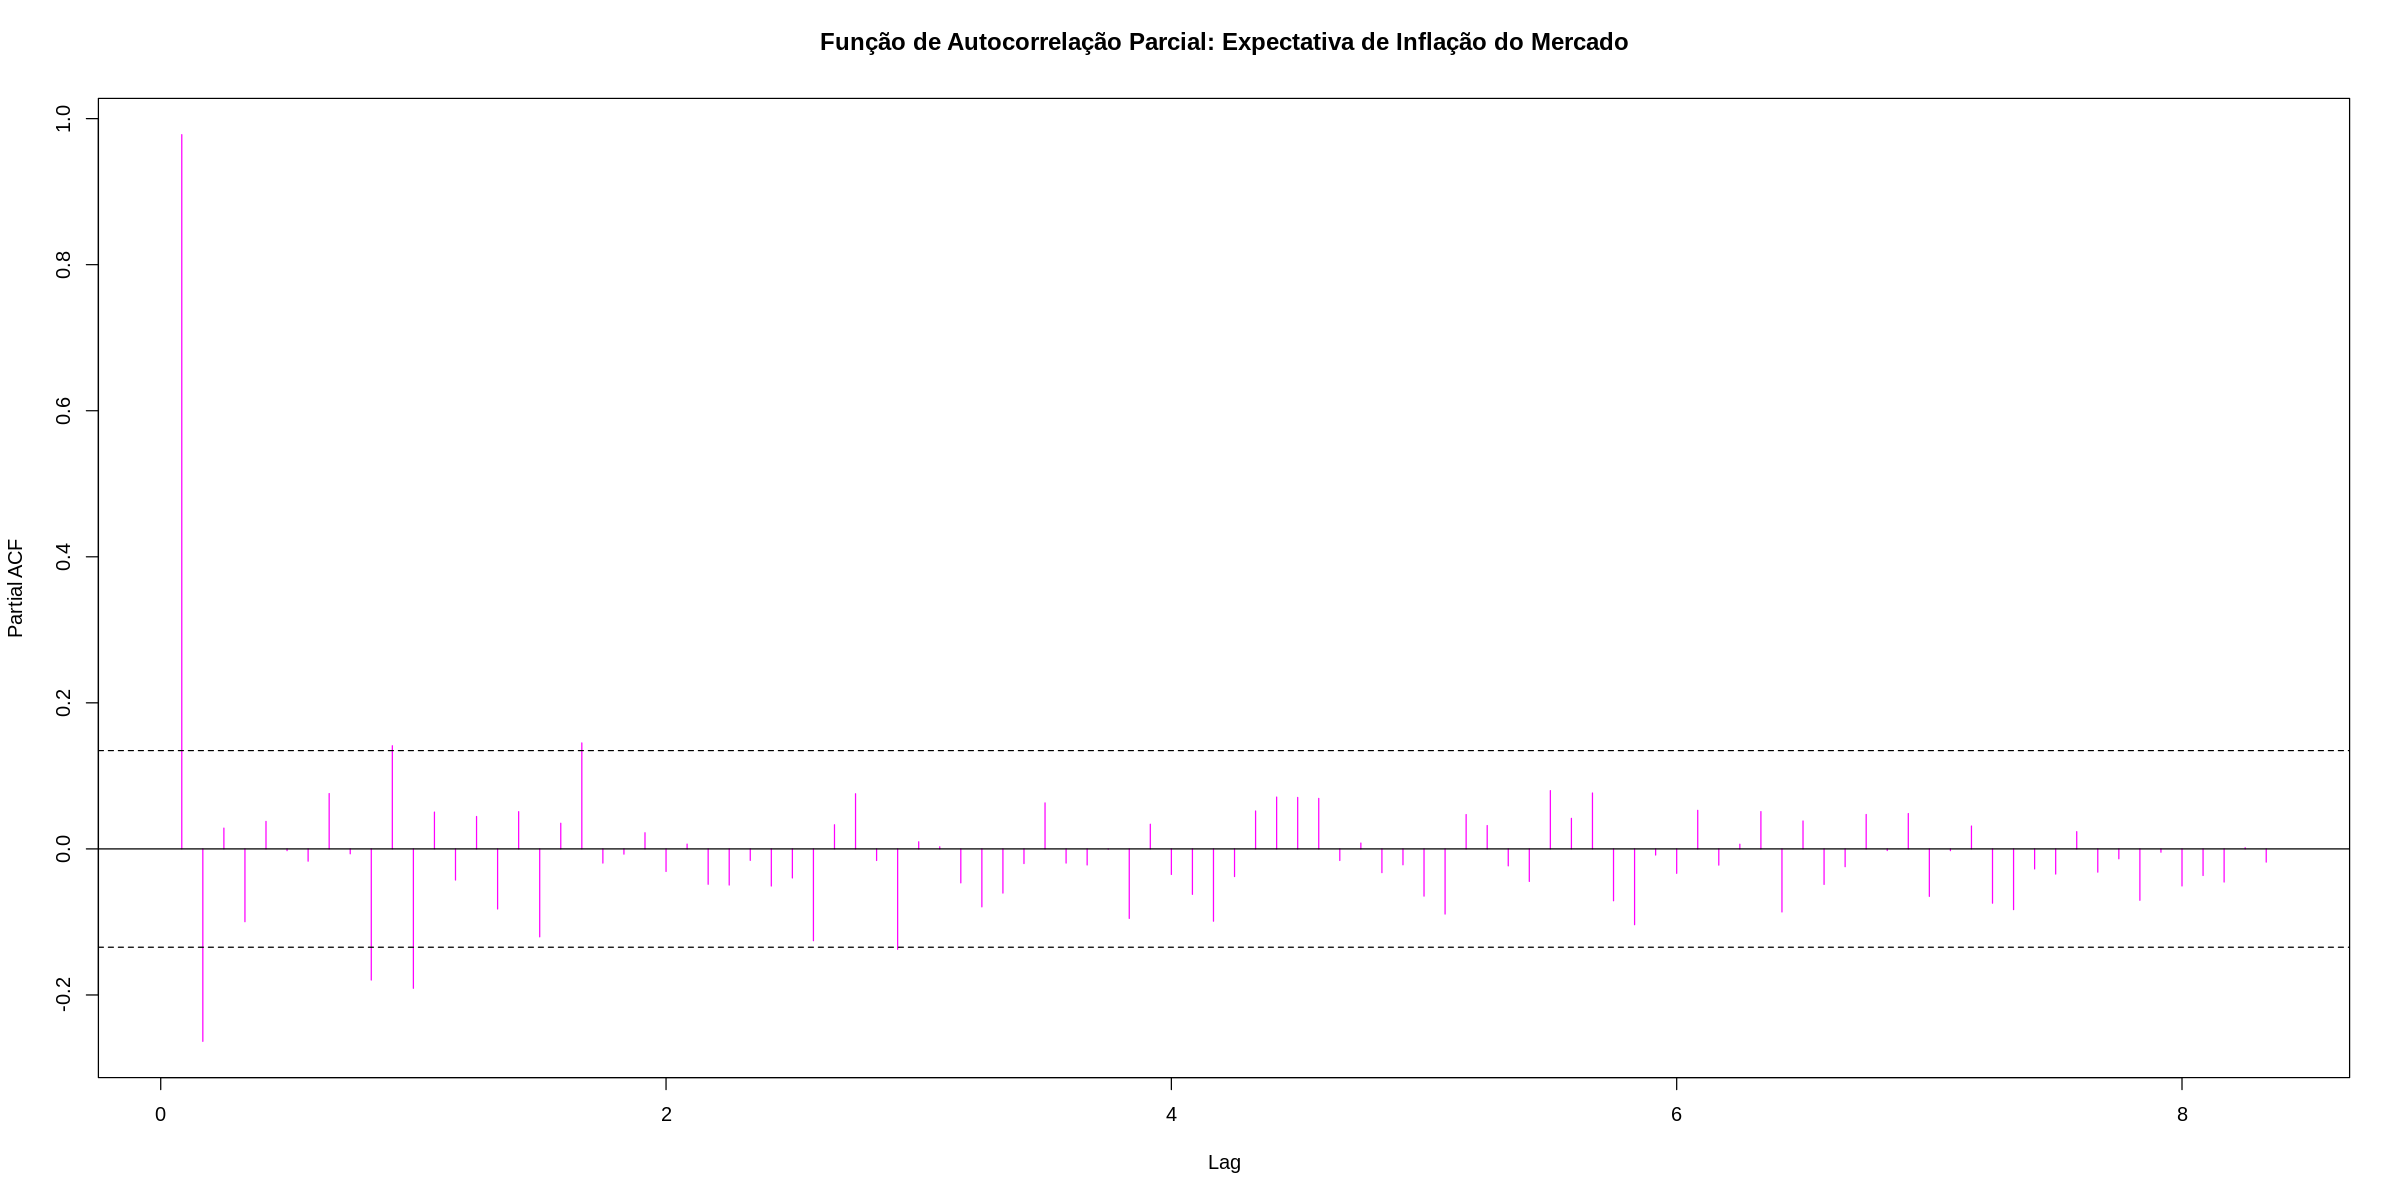

In [10]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Função de Autocorrelação Parcial
pacf(df_public_data$market_inflation_expectation,
    main = "Função de Autocorrelação Parcial: Expectativa de Inflação do Mercado",
    col = "magenta",
    ci.col = "black",
    lag.max = 100)

#### ADF (Augmented-Dickey-Fuller)

- $H_0$: possui raiz unitária

  * _tau3_: hipótese nula (raiz unitária)
  * _phi2_: hipótese nula (raiz unitária, sem tendência e sem drift)
  * _phi3_: hipótese nula (raiz unitária e sem tendência)

In [11]:
### Consumer Inflation Expectation
summary( ur.df( df_public_data$consumer_inflation_expectation, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09727 -0.18553 -0.00166  0.16405  0.94642 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.3446329  0.1234278   2.792  0.00579 **
z.lag.1      -0.0525554  0.0177815  -2.956  0.00353 **
tt            0.0002182  0.0004034   0.541  0.58920   
z.diff.lag1   0.1946187  0.0711953   2.734  0.00688 **
z.diff.lag2   0.0147654  0.0718057   0.206  0.83731   
z.diff.lag3   0.1015867  0.0718119   1.415  0.15887   
z.diff.lag4  -0.0223212  0.0715060  -0.312  0.75527   
z.diff.lag5   0.2414099  0.0723789   3.335  0.00103 **
z.diff.lag6   0.0647941  0.0741324   0.874  0.38324   
z.diff.lag7   0.0354557  0.0731191   0.485  0.62832   
z.diff.lag8   0.0347780  0.0717438   0.485 

**Resultado**

- Como, em módulo, os valores de test-statistic são **menores** que tau3, phi2 e phi3, **não se rejeita** as hipóteses nulas para um nível de significância de 10%, ou seja, a série temporal **possui raiz unitária**, o que significa que é **não-estacionária**.

In [12]:
### Market Inflation Expectation
summary( ur.df( df_public_data$market_inflation_expectation, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67893 -0.09350  0.00661  0.10517  0.48790 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.1842747  0.0782708   2.354 0.019611 *  
z.lag.1      -0.0329527  0.0145771  -2.261 0.024957 *  
tt           -0.0002158  0.0002176  -0.992 0.322659    
z.diff.lag1   0.3718800  0.0725744   5.124 7.51e-07 ***
z.diff.lag2  -0.1166166  0.0755028  -1.545 0.124177    
z.diff.lag3   0.1781735  0.0746271   2.388 0.017976 *  
z.diff.lag4   0.0071267  0.0743257   0.096 0.923717    
z.diff.lag5  -0.0025469  0.0735746  -0.035 0.972423    
z.diff.lag6   0.0274521  0.0731966   0.375 0.708059    
z.diff.lag7  -0.0872526  0.0734795  -1.187 0.236584    
z.diff.lag8  -0.0929766  0.07379

**Resultado**

- Como, em módulo, os valores de test-statistic são **menores** que tau3, phi2 e phi3, **não se rejeita** as hipóteses nulas para um nível de significância de 10%, ou seja, a série temporal **possui raiz unitária**, o que significa que é **não-estacionária**.

#### KPSS

- $H_0$: não possui raiz unitária

In [13]:
### Consumer Inflation Expectation
summary( ur.kpss( df_public_data$consumer_inflation_expectation, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.2125 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é maior que o valor crítico, rejeita-se a hipótese nula para um nível de significância de 10%, ou seja, a série possui raiz unitária, o que significa que é não-estacionária.

In [14]:
### Market Inflation Expectation
summary( ur.kpss( df_public_data$market_inflation_expectation, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.5513 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é **maior** que o valor crítico, **rejeita-se** a hipótese nula para um nível de significância de 10%, ou seja, a série **possui raiz unitária**, o que significa que é **não-estacionária**.

### **Induzir Estacionariedade**

In [15]:
diff_consumer_inflation_expectation = diff( df_public_data$consumer_inflation_expectation )
diff_market_inflation_expectation = diff( df_public_data$market_inflation_expectation )

df_public_data_diff <- data.frame( month = time( diff_consumer_inflation_expectation ), diff_consumer_inflation_expectation, diff_market_inflation_expectation)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


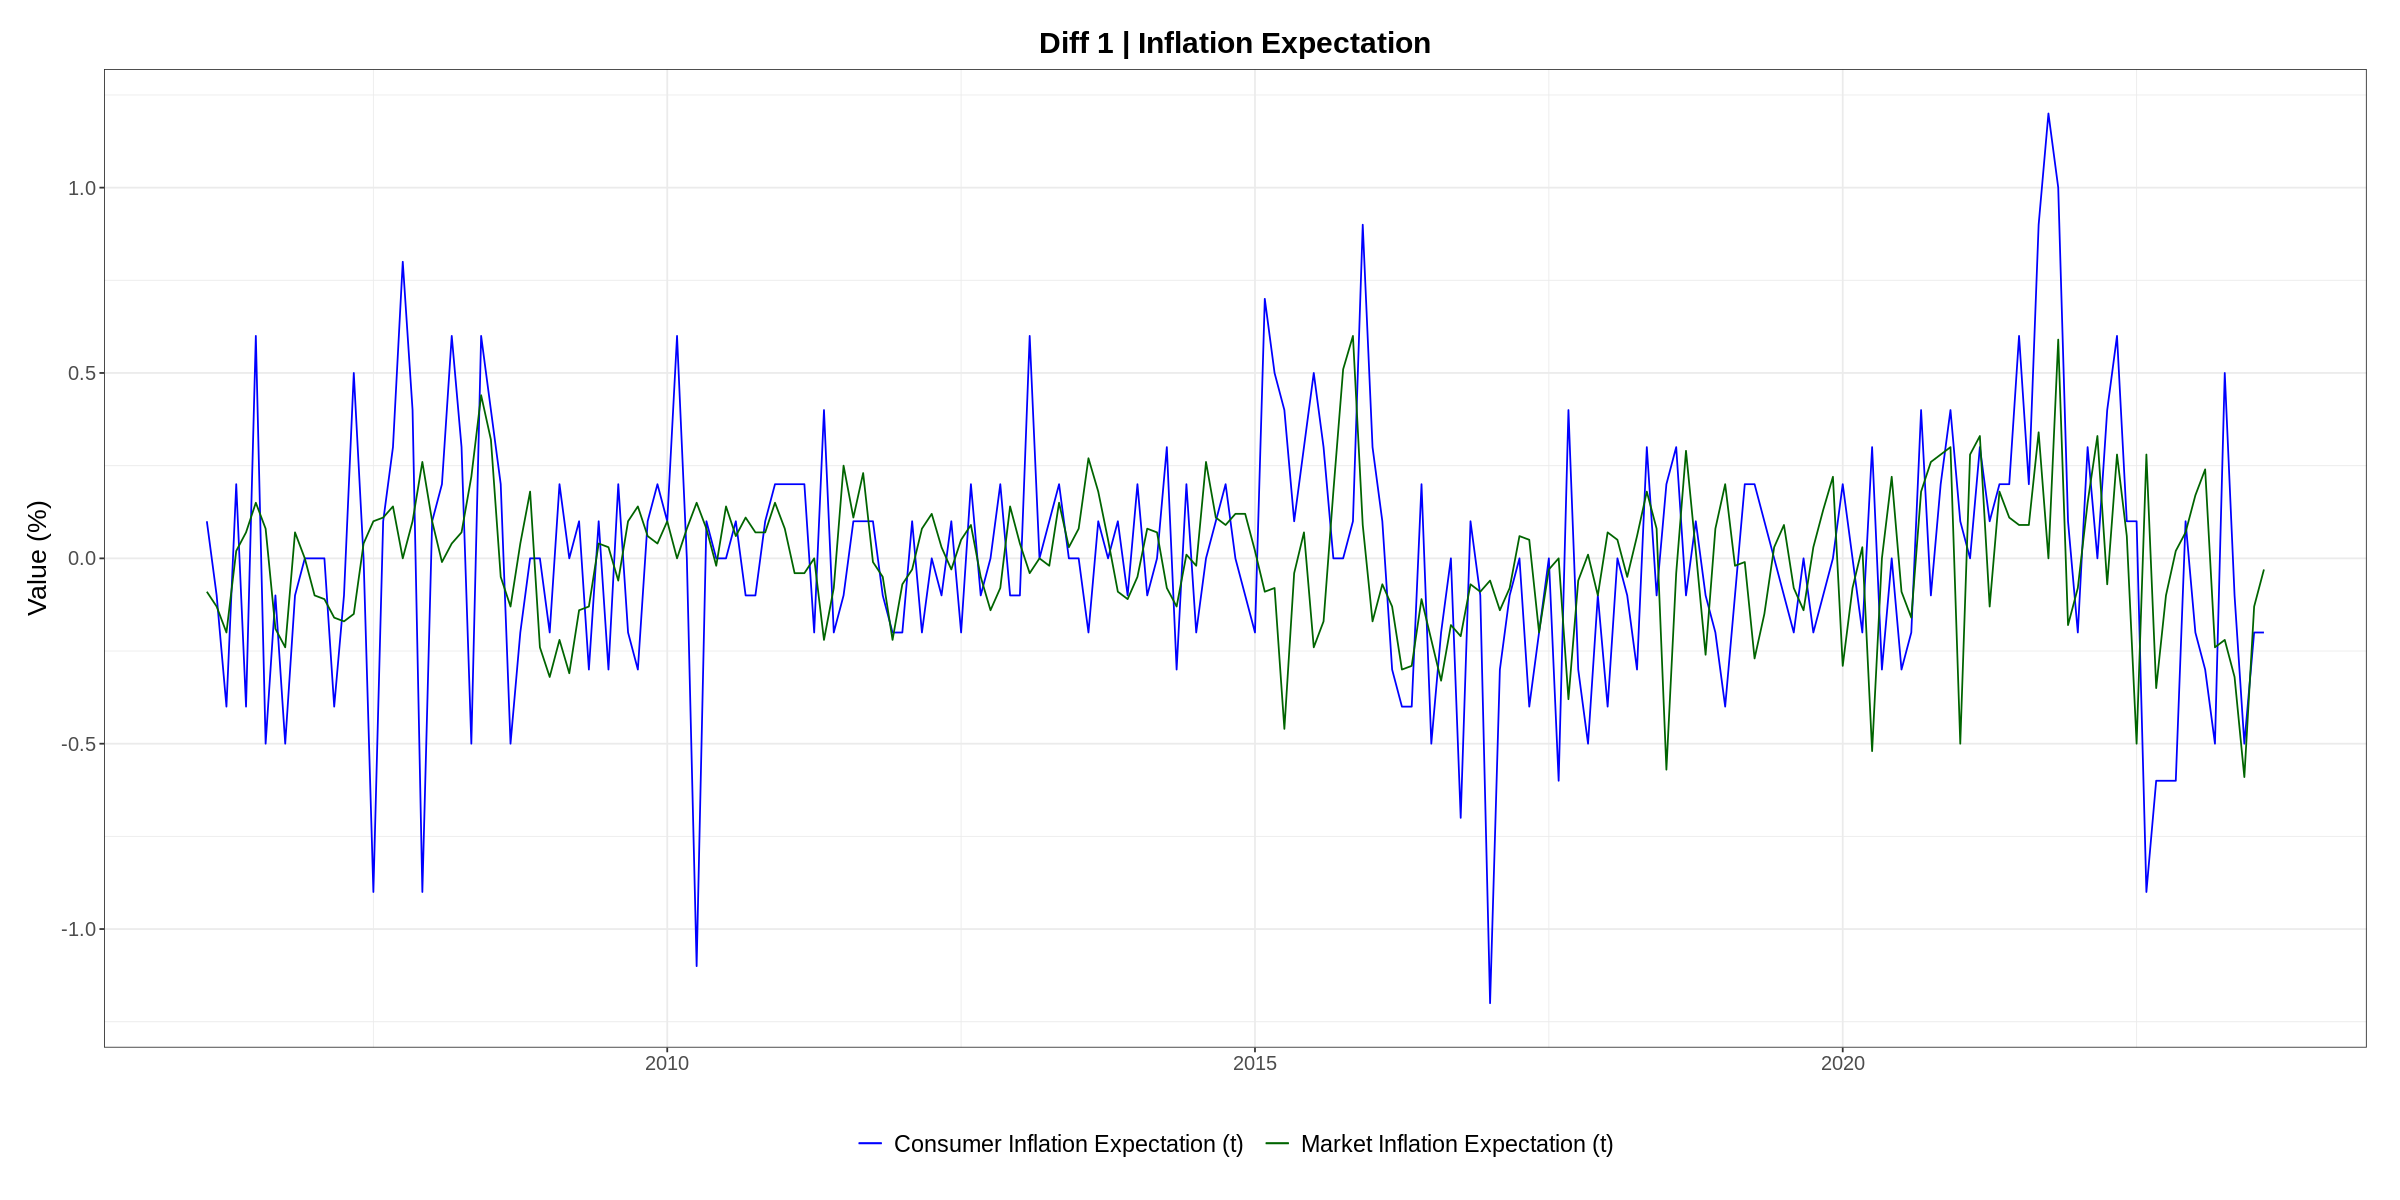

In [16]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Plotar as séries temporais de "consumer_inflation_expectation" e "market_inflation_expectation"
ggplot(df_public_data_diff) +
  geom_line(aes(x = month, y = diff_consumer_inflation_expectation, color = "Consumer Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = diff_market_inflation_expectation, color = "Market Inflation Expectation (t)")) +
  labs(x = "", y = "Value (%)", title = "Diff 1 | Inflation Expectation") +
  scale_color_manual(values = c("blue", "darkgreen"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

#### ADF (Augmented-Dickey-Fuller)

- $H_0$: possui raiz unitária

  * _tau3_: hipótese nula (raiz unitária)
  * _phi2_: hipótese nula (raiz unitária, sem tendência e sem drift)
  * _phi3_: hipótese nula (raiz unitária e sem tendência)

In [17]:
### Consumer Inflation Expectation
summary( ur.df( df_public_data_diff$diff_consumer_inflation_expectation, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.12904 -0.15484 -0.00459  0.17416  0.95335 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.498e-03  5.039e-02   0.069 0.944723    
z.lag.1      -6.854e-01  1.591e-01  -4.308 2.69e-05 ***
tt            4.672e-05  4.050e-04   0.115 0.908277    
z.diff.lag1  -1.415e-01  1.559e-01  -0.907 0.365363    
z.diff.lag2  -1.482e-01  1.533e-01  -0.966 0.335150    
z.diff.lag3  -4.463e-02  1.524e-01  -0.293 0.770056    
z.diff.lag4  -7.174e-02  1.497e-01  -0.479 0.632255    
z.diff.lag5   1.621e-01  1.480e-01   1.095 0.274867    
z.diff.lag6   2.013e-01  1.440e-01   1.398 0.163796    
z.diff.lag7   2.158e-01  1.403e-01   1.539 0.125605    
z.diff.lag8   2.410e-01  1.353e-

**Resultado**

- Como, em módulo, os valores de test-statistic são **maiores** que tau3, phi2 e phi3, **rejeita-se** as hipóteses nulas para um nível de significância de 10%, ou seja, a série temporal **não possui raiz unitária**, o que significa que é **estacionária**.

In [18]:
### Market Inflation Expectation
summary( ur.df( df_public_data_diff$diff_market_inflation_expectation, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67257 -0.10029  0.00179  0.10448  0.45013 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0207259  0.0277087   0.748 0.455425    
z.lag.1      -0.6699565  0.1935084  -3.462 0.000667 ***
tt           -0.0001776  0.0002212  -0.803 0.423183    
z.diff.lag1   0.0357543  0.1896732   0.189 0.850690    
z.diff.lag2  -0.0962451  0.1852639  -0.520 0.604038    
z.diff.lag3   0.0676405  0.1743623   0.388 0.698518    
z.diff.lag4   0.0522451  0.1674161   0.312 0.755345    
z.diff.lag5   0.0243864  0.1543928   0.158 0.874670    
z.diff.lag6   0.0343206  0.1442624   0.238 0.812222    
z.diff.lag7  -0.0658933  0.1360428  -0.484 0.628711    
z.diff.lag8  -0.1707339  0.12751

**Resultado**

- Como, em módulo, os valores de test-statistic são **maiores** que tau3 e phi3, mas não que phi2, **rejeita-se** 2 das 3 hipóteses nulas para um nível de significância de 10%, ou seja, a série temporal **não possui raiz unitária**, o que significa que é **estacionária**, mas a série é **não estacionária** após a segunda diferenciação.

#### KPSS

- $H_0$: não possui raiz unitária

In [19]:
### Consumer Inflation Expectation
summary( ur.kpss( df_public_data_diff$diff_consumer_inflation_expectation, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0688 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é **menor** que o valor crítico, **não se rejeita** a hipótese nula para um nível de significância de 10%, ou seja, a série **não possui raiz unitária**, o que significa que é **estacionária**.

In [20]:
### Market Inflation Expectation
summary( ur.kpss( df_public_data_diff$diff_market_inflation_expectation, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0637 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é **menor** que o valor crítico, **não se rejeita** a hipótese nula para um nível de significância de 10%, ou seja, a série **não possui raiz unitária**, o que significa que é **estacionária**.